### Equipe 6 - Análise do Uso de Cartão de Crédito por Clientes de um Banco
#### Daniel Rebouças de Queiroz      - 421751
#### Pedro Ernesto de Oliveira Primo - 418465
#### Andre Wagner de Barros Silva    - 504223
#### Horley Alfredo dos Santos       - 473104

In [55]:
!pip install plotly
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn

### Nesse trabalho usaremos uma base de dados retirada do kaggle, através do link https://www.kaggle.com/sakshigoyal7/credit-card-customers. A partir disso faremos as seguintes análises:

#### 1 - Uma maior escolaridade implica em uma maior renda?
#### 2 - Ter uma maior renda implica necessariamente em um maior limite de crédito?
#### 3 - O que é mais importante para um maior limite de crédito? O número de transações ou os valores que foram transacionados?
#### 4 - Clientes que passam maiores períodos de tempo inativos gastam menos?
#### 5 - O numero de dependentes e a escolaridade de um cliente influencia no seu limite de crédito?

# Importação do dataset de Dados Bancários

In [57]:
df = pd.read_csv('BankChurners.csv')

In [58]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# Gráficos das divisões dos clientes por cada feature

## Clientes por Sexo

In [59]:
fig = px.pie(df, names='Gender', title='Clientes por Sexo', )
fig.update_layout(height=400, width=700)
fig.show()

## Clientes por Escolaridade

In [60]:
fig = px.pie(df, names='Education_Level', title='Clientes por Escolaridade')
fig.update_layout(height=400, width=700)
fig.show()

## Clientes por Renda Anual

In [61]:
fig = px.pie(df, names='Income_Category', title='Clientes por Renda Anual')
fig.update_layout(height=400, width=700)
fig.show()

## Clientes por Estado Civil

In [62]:
fig = px.pie(df, names='Marital_Status', title='Clientes por Estado Civil')
fig.update_layout(height=400, width=700)
fig.show()

## Clientes por Número de dependentes

In [63]:
fig = px.pie(df, names='Dependent_count', title='Clientes por Número de dependentes')
fig.update_layout(height=400, width=700)
fig.show()

# Limpeza dos dados

### Removendo as duas últimas colunas pois elas não serão usadas

In [64]:
df.drop(columns=df.columns[-2:], inplace=True)

### Removendo a coluna 'Card_Category' pois as colunas 'Credit_Limit' e 'Card_Category' possuem uma baixa correlação. Isso pode acontecer pois possívelmente a categoria do cartão influencia apenas no limite de crédito, algo que já existe no dataset. 

In [65]:
le = LabelEncoder()
df['Card_Category'] = le.fit_transform(df['Card_Category'])
df['Credit_Limit'] = le.fit_transform(df['Credit_Limit'])
df[['Card_Category', 'Credit_Limit']].corr()

,Card_Category,Credit_Limit
Card_Category,1.000000,0.390493
Credit_Limit,0.390493,1.000000


In [66]:
df['Credit_Limit'] = le.inverse_transform(df['Credit_Limit'])
df.drop(columns=['Card_Category'], inplace=True)

### Excluindo os sifrões da coluna "Income_Category", que significa Categoria de Renda, pois é implícito que a renda é mostrada como dólares por ano e também para despoluir um pouco os dados. 

In [67]:
df['Income_Category'] = [income.replace('$', '').replace('Less than', '-') for income in df['Income_Category']]

### Substituindo 'Existing Customer' por 0 e 'Attrited Customer' por 1 para simplificar os dados, pois essa coluna nos diz se a conta bancária foi encerrada (1) ou não (0)

In [68]:
df['Attrition_Flag'] = [account.replace('Existing Customer', '0').replace('Attrited Customer', '1') for account in df['Attrition_Flag']]

# Análise dos dados

Avaliou-se as estatísticas descritivas de alguns atributos do dataframe considerado (df), como a média, desvio padrão e valores mínimo e máximo. A média da idade (46.32 anos) indica que os clientes apresentam uma faixa etária que não é muito alta nem muito baixa, além disso, outra informação que pode ser extraída da tabela abaixo é que a média dos meses de permanência dos clientes constitui um valor razoável, ou seja, nem muito baixa (o que indicaria muita evasão de clientes) nem muito elevada (o que indicaria alto grau de satisfação dos clientes para com os serviços prestados).

In [69]:
temp1 = df.describe()
temp2 = temp1[['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy','Total_Trans_Amt','Total_Trans_Ct']]
temp2

,Customer_Age,Months_on_book,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,35.928409,8631.953698,7469.139637,4404.086304,64.858695
std,8.016814,7.986416,9088.776650,9090.685324,3397.129254,23.472570
min,26.000000,13.000000,1438.300000,3.000000,510.000000,10.000000
25%,41.000000,31.000000,2555.000000,1324.500000,2155.500000,45.000000
50%,46.000000,36.000000,4549.000000,3474.000000,3899.000000,67.000000
75%,52.000000,40.000000,11067.500000,9859.000000,4741.000000,81.000000
max,73.000000,56.000000,34516.000000,34516.000000,18484.000000,139.000000


Verificou-se ainda que a média, a variância e o desvio padrão da idade dos clientes por sexo são bastante semelhantes.

In [70]:
df.groupby("Gender").agg({"Customer_Age": ["mean", "var", "std"]})

Customer_Age                     
               mean        var       std
Gender                                  
F         46.456887  63.153918  7.946944
M         46.178863  65.495057  8.092902

Verificou-se a correlação entre a idade dos clientes e o período de permanência dos mesmos no banco, em meses. Pelo gráfico de dispersão percebe-se uma correlação positiva entre estes dois atributos, o que indica que clientes mais velhos tendem a permanecer mais tempo com a conta ativa.

In [71]:
fig = px.scatter(df, x='Customer_Age', y='Months_on_book')
fig.update_layout(title='Correlação - Idade Cliente x Permanência (Meses)', height=400, width=700)
fig.show()

Analisou-se a correlação entre o limite de crédito dos clientes e a média do limite disponível para compra (últimos 12 meses). Pelo gráfico de dispersão percebe-se uma correlação bastante positiva entre estes dois atributos, o que faz sentido, já que quanto maior o limite de crédito de determinado cliente maior tende a ser seu limite disponível para compra.

In [72]:
fig = px.scatter(df, x='Credit_Limit', y='Avg_Open_To_Buy')
fig.update_layout(title='Correlação - Limite de Crédito x Limite Disponível', height=400, width=700)
fig.show()

Verificou-se também a correlação entre o total de transações e o valor das transações dos clientes (últimos 12 meses). Pelo gráfico de dispersão percebe-se uma correlação positiva entre estes dois atributos, o que faz sentido, já que quanto maior a quantidade de transações, maior tende a ser o montante das mesmas.

In [73]:
fig = px.scatter(df, x='Total_Trans_Ct', y='Total_Trans_Amt')
fig.update_layout(title='Correlação - Total Transações x Valor Transações (últimos 12 meses)', height=400, width=700)
fig.show()

Outras análise realizada foi o formato da distribuição dos dados para alguns atributos do dataframe. A partir do histograma gerado, percebe-se que os atributos Idade dos Clientes, Período de Permanência (meses) e Quantidade de Transações seguem uma distribuição próxima a normal, o que pode auxiliar na criação de um modelo para previsão da variável target limite de crédito, por exemplo. As variáveis Limite de Crédito e Taxa de Utilização Média apresentam distribuição próxima a exponencial. 

In [74]:
fig = make_subplots(rows=1, cols=3, column_titles=['Dist. dados Customer_Age', 'Dist. dados Months_on_book', 'Dist. dados Credit_Limit' ])
fig.add_trace(go.Histogram(x=df["Customer_Age"], name='Customer_Age'), row=1, col=1)
fig.add_trace(go.Histogram(x=df["Months_on_book"], name='Months_on_book'), row=1, col=2)
fig.add_trace(go.Histogram(x=df["Credit_Limit"], name='Credit_Limit'), row=1, col=3)
fig.show()

In [75]:
fig = make_subplots(rows=1, cols=3, column_titles=['Dist. dados Total_Trans_Amt', 'Dist. dados Total_Trans_Ct', 'Dist. dados Avg_Utilization_Ratio' ])
fig.add_trace(go.Histogram(x=df["Total_Trans_Amt"], name='Total_Trans_Amt'), row=1, col=1)
fig.add_trace(go.Histogram(x=df["Total_Trans_Ct"], name='Total_Trans_Ct'), row=1, col=2)
fig.add_trace(go.Histogram(x=df["Avg_Utilization_Ratio"], name='Avg_Utilization_Ratio'), row=1, col=3)
fig.show()

### 1. Uma maior escolaridade implica em uma maior renda?

Primeiro iremos descartar as linhas onde não temos informações da escolaridade do cliente, ou seja, a escolaridade é dada como 'Unknown'

In [76]:
education_income_df = df.drop(df[df['Education_Level'] == 'Unknown'].index)
education_income_df = education_income_df.drop(education_income_df[education_income_df['Income_Category'] == 'Unknown'].index)
education_income_df[['Education_Level', 'Income_Category']].sort_values(by=['Education_Level'])

,Education_Level,Income_Category
8132,College,40K - 60K
8698,College,40K - 60K
8697,College,80K - 120K
7339,College,60K - 80K
8690,College,60K - 80K
...,...,...
8333,Uneducated,- 40K
5279,Uneducated,40K - 60K
2916,Uneducated,80K - 120K
5283,Uneducated,- 40K


In [77]:
education_income_df = education_income_df[['Education_Level', 'Income_Category']]
education_income_df.sort_values(by=['Education_Level']).value_counts()

Education_Level  Income_Category
Graduate         - 40K              1139
High School      - 40K               671
Graduate         40K - 60K           553
Uneducated       - 40K               522
Graduate         80K - 120K          478
                 60K - 80K           422
High School      40K - 60K           355
College          - 40K               345
High School      80K - 120K          308
                 60K - 80K           307
Uneducated       40K - 60K           249
                 80K - 120K          217
Graduate         120K +              204
Uneducated       60K - 80K           195
College          40K - 60K           183
                 80K - 120K          175
Post-Graduate    - 40K               170
Doctorate        - 40K               158
High School      120K +              147
College          60K - 80K           132
Uneducated       120K +              119
Post-Graduate    40K - 60K           111
                 80K - 120K           81
                 60K - 8

Em seguida, foi agrupado a quantidade de clientes em cada nível de renda conforme a escolaridade:

In [78]:
uneducated = education_income_df.loc[(education_income_df['Education_Level']=="Uneducated")]
uneducated.groupby(['Income_Category'],as_index = False).size()

,Income_Category,size
0,- 40K,522
1,120K +,119
2,40K - 60K,249
3,60K - 80K,195
4,80K - 120K,217


In [79]:
highschool = education_income_df.loc[(education_income_df['Education_Level']=="High School")]
highschool.groupby(['Income_Category'],as_index = False).size()

,Income_Category,size
0,- 40K,671
1,120K +,147
2,40K - 60K,355
3,60K - 80K,307
4,80K - 120K,308


In [80]:
college = education_income_df.loc[(education_income_df['Education_Level']=="College")]
college.groupby(['Income_Category'],as_index = False).size()

,Income_Category,size
0,- 40K,345
1,120K +,70
2,40K - 60K,183
3,60K - 80K,132
4,80K - 120K,175


In [81]:
graduate = education_income_df.loc[(education_income_df['Education_Level']=="Graduate")]
graduate.groupby(['Income_Category'],as_index = False).size()

,Income_Category,size
0,- 40K,1139
1,120K +,204
2,40K - 60K,553
3,60K - 80K,422
4,80K - 120K,478


In [82]:
postgraduate = education_income_df.loc[(education_income_df['Education_Level']=="Post-Graduate")]
postgraduate.groupby(['Income_Category'],as_index = False).size()

,Income_Category,size
0,- 40K,170
1,120K +,30
2,40K - 60K,111
3,60K - 80K,77
4,80K - 120K,81


In [83]:
doctorate  = education_income_df.loc[(education_income_df['Education_Level']=="Doctorate")]
doctorate .groupby(['Income_Category'],as_index = False).size()

,Income_Category,size
0,- 40K,158
1,120K +,37
2,40K - 60K,70
3,60K - 80K,59
4,80K - 120K,57


Portanto, conforme pode ser observado pelos dados das tabelas, no grupo amostral observado o nível escolar não é um fator decisivo no nível de renda, tendo prevalecido as caractéristicas gerais do grupo, pois em todos a moda eram de pessoas que recebiam menos de \$40K de renda anual, logo o perfil de cliente mais comum é o de nível escolar "graduate" e que recebe menos de $40k anuais.

### 2. Ter uma maior renda implica necessariamente em um maior limite de crédito?

Primeiro fez-se a limpeza de dados faltosos, retirando os valores desconhecidos das colunas e criou-se um novo dataframe com somente as variáveis de renda e crédito:

In [84]:
income_df = df.drop(df[df['Income_Category'] == 'Unknown'].index)
income_df = income_df.drop(income_df[income_df['Credit_Limit'] == 'Unknown'].index)
income_df = income_df[['Income_Category', 'Credit_Limit']].sort_values(by=['Income_Category'])
income_df

,Income_Category,Credit_Limit
4992,- 40K,1468.0
5516,- 40K,1696.0
5513,- 40K,1842.0
5512,- 40K,2021.0
5510,- 40K,2178.0
...,...,...
2107,80K - 120K,8823.0
8605,80K - 120K,34516.0
2103,80K - 120K,9131.0
5276,80K - 120K,26108.0


Para facilitar a visualização, é exibido a tabela ordenada pelo limite de crédito para cada faixa de renda:

In [85]:
income_df[['Income_Category','Credit_Limit']]
income_40 = income_df.loc[(income_df['Income_Category']=="- 40K")]
income_40.sort_values(by=['Credit_Limit'])

,Income_Category,Credit_Limit
6548,- 40K,1438.3
5239,- 40K,1438.3
6775,- 40K,1438.3
3272,- 40K,1438.3
2389,- 40K,1438.3
...,...,...
1105,- 40K,15987.0
8904,- 40K,15987.0
9550,- 40K,15987.0
3800,- 40K,15987.0


In [86]:
income_df[['Income_Category','Credit_Limit']]
income40 = income_df.loc[(income_df['Income_Category']=="40K - 60K")]
income40.sort_values(by=['Credit_Limit'])

,Income_Category,Credit_Limit
862,40K - 60K,1438.3
6449,40K - 60K,1438.3
5122,40K - 60K,1438.3
6668,40K - 60K,1438.3
1951,40K - 60K,1438.3
...,...,...
551,40K - 60K,23981.0
9612,40K - 60K,23981.0
9307,40K - 60K,23981.0
9344,40K - 60K,23981.0


In [87]:
income_df[['Income_Category','Credit_Limit']]
income60 = income_df.loc[(income_df['Income_Category']=="60K - 80K")]
income60.sort_values(by=['Credit_Limit'])

,Income_Category,Credit_Limit
207,60K - 80K,1438.3
7240,60K - 80K,1438.3
4852,60K - 80K,1438.3
419,60K - 80K,1438.3
2969,60K - 80K,1438.3
...,...,...
2319,60K - 80K,34516.0
8932,60K - 80K,34516.0
9535,60K - 80K,34516.0
9513,60K - 80K,34516.0


In [88]:
income_df[['Income_Category','Credit_Limit']]
income120 = income_df.loc[(income_df['Income_Category']=="120K +")]
income120.sort_values(by=['Credit_Limit'])

,Income_Category,Credit_Limit
4263,120K +,1438.3
6638,120K +,1438.3
2045,120K +,1438.3
7639,120K +,1438.3
4495,120K +,1438.3
...,...,...
9027,120K +,34516.0
9846,120K +,34516.0
4538,120K +,34516.0
4489,120K +,34516.0


Por fim, criou-se um novo dataframe com as médias dos límites de crédito para cada faixa de renda, e conforme pode ser observado, há relação proporcionalmente direta entre a renda média e o límite de crédito concedido, portanto ter renda maior implica em um maior límite de crédito:

In [89]:
income_df.groupby(['Income_Category']).mean()

,Credit_Limit
Income_Category,
- 40K,3754.404521
120K +,19717.322558
40K - 60K,5462.259832
60K - 80K,10758.772967
80K - 120K,15809.890945


### 3. O que é mais importante para um maior limite de crédito? O número de transações ou os valores que foram transacionados?

Foi feita a limpeza dos dados faltosos e criado um dataframe com as variáveis de crédito concedido, número de transação e valores transacionados:

In [90]:
me_df = df.drop(df[df['Credit_Limit'] == 'Unknown'].index)
me_df = me_df.drop(me_df[me_df['Total_Trans_Ct'] == 'Unknown'].index)
me_df = me_df.drop(me_df[me_df['Total_Trans_Amt'] == 'Unknown'].index)
correlação = me_df[['Credit_Limit','Total_Trans_Amt','Total_Trans_Ct']].sort_values(by=['Credit_Limit'])
correlação

,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
6934,1438.3,4707,88
419,1438.3,1093,22
4650,1438.3,1693,37
6859,1438.3,2171,38
6857,1438.3,5136,81
...,...,...,...
9714,34516.0,7721,75
3429,34516.0,2681,55
1451,34516.0,2574,72
3393,34516.0,4281,72


Foi ultilizado o método de calcular a correlação entre os conjuntos de dados para analisar qual tem maior correlação com o límite de crédito:

In [91]:
matriz = correlação.corr()
matriz

,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
Credit_Limit,1.000000,0.171730,0.075927
Total_Trans_Amt,0.171730,1.000000,0.807192
Total_Trans_Ct,0.075927,0.807192,1.000000


Para facilitar a vizualização foi a criada a matriz de correlação e conforme pode ser observado há fraca correlação entre os  entre os dados, porém em comparação, o total de valor transacionado implica muito mais em um maior límite de crédito do que a quantidade de transações:

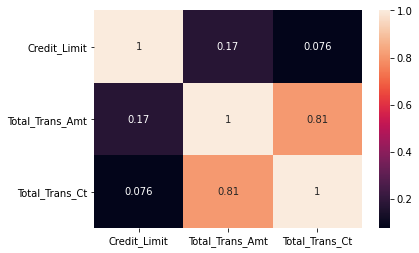

In [92]:
sn.heatmap(matriz, annot=True)
plt.show()

### 4. Clientes que passam maiores períodos de tempo inativos gastam menos?

Foi feita a limpeza dos dados e criado o dataframe com os dados de inatividade e o total dos valores transacionados por cliente:

In [93]:
inatividade = df.drop(df[df['Months_Inactive_12_mon'] == 'Unknown'].index)
inatividade = df.drop(df[df['Total_Trans_Amt'] == 'Unknown'].index)
inatividade = df[['Months_Inactive_12_mon', 'Total_Trans_Amt']]
inatividade

,Months_Inactive_12_mon,Total_Trans_Amt
0,1,1144
1,1,1291
2,1,1887
3,4,1171
4,1,816
...,...,...
10122,2,15476
10123,2,8764
10124,3,10291
10125,3,8395


Em seguida o dataframe foi agrupado pelo tempo de inatividade e calculado a média de valores transacionados pelos clientes com mesmo tempo de inatividade:

In [94]:
inatividade.groupby(['Months_Inactive_12_mon']).mean()

,Total_Trans_Amt
Months_Inactive_12_mon,
0,3156.344828
1,4672.815943
2,4401.069775
3,4321.202808
4,3769.314943
5,4688.280899
6,4326.024194


Portanto é possível concluir que o tempo de inatividade não implica em um menor valor transacionado, além disso é notado que clientes com algum mês inativo têm em média mais valores transacionados do que clientes que usam o cartão mensalmente.

### 5. O numero de dependentes e a escolaridade de um cliente influencia no seu limite de crédito?

#### a. Dependentes

Vemos que a maioria dos clientes possuem 2 ou 3 filhos e a minoria nenhum ou 5 filhos.

In [95]:
df['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

In [96]:
dict_mean_dependents = {}
dependent_df = df[['Dependent_count', 'Credit_Limit']]
for dependents in dependent_df['Dependent_count'].unique():
    dict_mean_dependents[dependents] = dependent_df.loc[dependent_df['Dependent_count']== dependents].mean()
dependents_mean_credit_df = pd.DataFrame.from_dict(dict_mean_dependents).transpose()
dependents_mean_credit_df.sort_values(by=['Dependent_count'])

,Dependent_count,Credit_Limit
0,0.0,7160.763717
1,1.0,7905.123449
2,2.0,8717.175292
3,3.0,8976.506589
4,4.0,9454.955019
5,5.0,9110.453302


Veja que o número de dependentes possui uma certa influencia no limite de crédito. Se olharmos para clientes com 0 ou 1 dependentes, podemos ver que possuem um limite muito menor que clientes com 2 ou mais, o mesmo vale para clientes com 4 ou 5. Apesar de clientes com 5 dependentes possuírem em média um limite menor, o que pode ser consequência de outros fatores como nível de escolaridade, número de transações, renda anual, etc. Podemos concluir que de certa forma quanto mais dependentes o cliente tiver, maior será seu limite de crédito. 

#### b. Escolaridade

Primeiro iremos descartar as linhas onde não temos informações da escolaridade do cliente, ou seja, a escolaridade é dada como 'Unknown'

In [97]:
education_df = df.drop(df.loc[df['Education_Level'] == 'Unknown'].index)
education_df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [98]:
education_mean_credit_df = education_df[['Education_Level', 'Credit_Limit']]

dict_mean = { 'Uneducated' : '',
              'High School' : '',
              'Graduate' : '',
              'College' : '',
              'Post-Graduate' : '',
              'Doctorate' : ''
}
for educ_lvl in education_mean_credit_df['Education_Level'].unique():
    dict_mean[educ_lvl] = education_mean_credit_df.loc[education_mean_credit_df['Education_Level']== educ_lvl].mean()
education_mean_credit_df = pd.DataFrame.from_dict(dict_mean).transpose()
education_mean_credit_df

,Credit_Limit
Uneducated,8899.509011
High School,8605.823547
Graduate,8566.100927
College,8684.536130
Post-Graduate,8862.560465
Doctorate,8413.258980


Veja que todos os níveis de educação possuem uma média de limite de crédito praticamente iguais

Agora avaliaremos as escolaridades dos clientes que possuem o maior limite disponível

In [99]:
education_df['Credit_Limit'].max()

34516.0

In [100]:
education_df.loc[education_df['Credit_Limit'] == 34516]['Education_Level'].value_counts()

Graduate         162
High School       97
Uneducated        72
College           58
Post-Graduate     28
Doctorate         19
Name: Education_Level, dtype: int64

Agora avaliaremos as escolaridades dos clientes que possuem o menor limite disponível

In [101]:
education_df['Credit_Limit'].min()

1438.3

In [102]:
education_df.loc[education_df['Credit_Limit'] == 1438.3]['Education_Level'].value_counts()

Graduate         149
High School       86
Uneducated        73
College           67
Doctorate         36
Post-Graduate     24
Name: Education_Level, dtype: int64

Percebe-se que o número de clientes por escolaridade que recebem o limite mínimo e máximo de crédito quase não diferem, logo podemos concluir que apenas a escolaridade não é um fator exclusivo para decidir o limite de crédito de um cliente.